# **Total Portfolio Creation**

## Import Libraries and Dependencies

In [1]:
#Import your libraries and dependencies
import os
import requests
import pandas as pd
import alpaca_trade_api as tradeapi
import numpy as np
from dotenv import load_dotenv

%matplotlib inline

In [2]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

## Set Portfolio Share Values

In [3]:
#Amount of shares are calculated based on the closing price of each stock on January 4, 2016
#Each stock has $10,000 worth

#AAPL closing price = $24.36
#FB closing price = $102.22
#NVDA closing price = $31.66
#PYPL closing price = $34.75
#SHOP closing price = $25.72
#SQ closing price = $12.16
#TDOC closing price = $17.99
#TSLA closing price = $44.68
#TWTR closing price = $22.56
#Z closing price = $22.11

aapl_shares = 411
fb_shares = 98
nvda_shares = 316
pypl_shares = 288
shop_shares = 389
sq_shares = 823
tdoc_shares = 556
tsla_shares = 224
twtr_shares = 444
z_shares = 453

In [9]:
total_portfolio = pd.read_csv('../Resources/Portfolio_Closing_Prices.csv', index_col = 'Date', parse_dates = True, infer_datetime_format = True)

total_portfolio.tail(10)

AAPL          FB        NVDA        PYPL         SHOP  \
Date                                                                      
2021-04-27  134.389999  303.570007  615.270020  268.820007  1156.890015   
2021-04-28  133.580002  307.100006  611.070007  271.089996  1288.800049   
2021-04-29  133.479996  329.510010  612.989990  267.850006  1233.069946   
2021-04-30  131.460007  325.079987  600.380005  262.290009  1182.510010   
2021-05-03  132.539993  322.579987  593.469971  259.089996  1122.010010   
2021-05-04  127.849998  318.359985  574.049988  250.160004  1142.939941   
2021-05-05  128.100006  315.019989  578.340027  247.399994  1120.349976   
2021-05-06  129.740005  320.019989  580.919983  252.020004  1090.930054   
2021-05-07  130.210007  319.079987  592.489990  253.360001  1108.599976   
2021-05-10  126.849998  305.970001  570.630005  243.630005  1080.239990   

                    SQ        TDOC        TSLA       TWTR           Z  
Date                                                                   
2021-04-27  253.789993  189.949997  704.739990  66.010002  138.990005  
2021-04-28  254.199997  186.309998  694.400024  65.699997  135.869995  
2021-04-29  247.759995  170.860001  677.000000  65.089996  132.440002  
2021-04-30  244.820007  172.350006  709.440002  55.220001  130.119995  
2021-05-03  243.679993  163.210007  684.900024  54.580002  125.699997  
2021-05-04  231.190002  158.369995  673.599976  54.400002  121.449997  
2021-05-05  231.869995  156.990005  670.940002  53.560001  113.800003  
2021-05-06  223.960007  151.899994  663.539978  53.810001  113.750000  
2021-05-07  233.350006  151.039993  672.369995  53.790001  118.544998  
2021-05-10  216.429993  141.050003  629.039978  51.810001  112.470001

<AxesSubplot:xlabel='Date'>

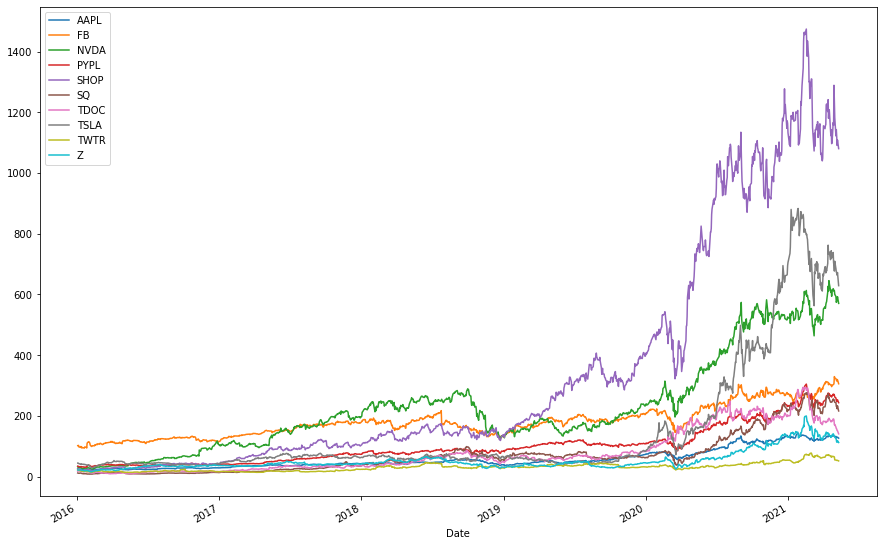

In [5]:
total_portfolio.plot(figsize = (15,10))

In [6]:
daily_returns = total_portfolio.pct_change().dropna()

daily_returns.head(10)

AAPL        FB      NVDA      PYPL      SHOP        SQ  \
Date                                                                     
2016-01-05 -0.025059  0.004989  0.016064 -0.012662 -0.015941 -0.053454   
2016-01-06 -0.019570  0.002336 -0.041350 -0.009618 -0.000395  0.000869   
2016-01-07 -0.042205 -0.049043 -0.039645 -0.025015 -0.024901 -0.031250   
2016-01-08  0.005288 -0.006025 -0.021466 -0.013281  0.010539  0.013441   
2016-01-11  0.016192  0.001849  0.001688  0.010707 -0.042519  0.046861   
2016-01-12  0.014513  0.019075  0.016846  0.001211 -0.005446  0.021115   
2016-01-13 -0.025710 -0.039549 -0.030484 -0.029021 -0.099410 -0.039702   
2016-01-14  0.021871  0.030700 -0.020164  0.023350 -0.034612 -0.068045   
2016-01-15 -0.024015 -0.034563 -0.054412 -0.017037 -0.036337 -0.050832   
2016-01-19 -0.004839  0.003054  0.008115 -0.003405  0.020613 -0.077897   

                TDOC      TSLA      TWTR         Z  
Date                                                
2016-01-05  0.083936  0.000090 -0.028369 -0.005427  
2016-01-06  0.059487 -0.019648 -0.024179 -0.001364  
2016-01-07 -0.023233 -0.015477 -0.052828 -0.020947  
2016-01-08 -0.050050 -0.021563 -0.013820  0.027907  
2016-01-11 -0.008868 -0.014929 -0.016517  0.002715  
2016-01-12 -0.019474  0.010200 -0.001527  0.008123  
2016-01-13 -0.092324 -0.046007 -0.047910 -0.039839  
2016-01-14  0.048492  0.029305  0.017131 -0.031702  
2016-01-15 -0.040045 -0.005772 -0.055789  0.002889  
2016-01-19 -0.022914 -0.001317 -0.069677 -0.007681

In [7]:
daily_returns.tail()

AAPL        FB      NVDA      PYPL      SHOP        SQ  \
Date                                                                     
2021-05-04 -0.035386 -0.013082 -0.032723 -0.034467  0.018654 -0.051256   
2021-05-05  0.001955 -0.010491  0.007473 -0.011033 -0.019765  0.002941   
2021-05-06  0.012802  0.015872  0.004461  0.018674 -0.026260 -0.034114   
2021-05-07  0.003623 -0.002937  0.019917  0.005317  0.016197  0.041927   
2021-05-10 -0.025805 -0.041087 -0.036895 -0.038404 -0.025582 -0.072509   

                TDOC      TSLA      TWTR         Z  
Date                                                
2021-05-04 -0.029655 -0.016499 -0.003298 -0.033811  
2021-05-05 -0.008714 -0.003949 -0.015441 -0.062989  
2021-05-06 -0.032423 -0.011029  0.004668 -0.000439  
2021-05-07 -0.005662  0.013307 -0.000372  0.042154  
2021-05-10 -0.066141 -0.064444 -0.036810 -0.051246

<AxesSubplot:title={'center':'Portfolio Daily Returns'}, xlabel='Date'>

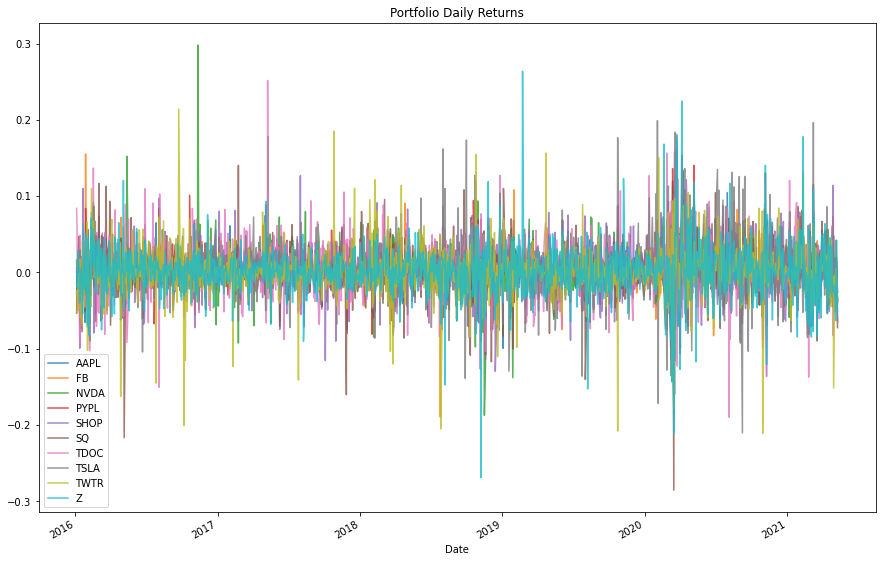

In [8]:
daily_returns.plot(figsize = (15,10), alpha = 0.8, title = 'Portfolio Daily Returns')